In [ ]:
!pip install catboost > None

In [ ]:
!pip install shap > None

In [ ]:
import shap

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.metrics import make_scorer #для создания авторских метрик
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/Distr_data_0202_last.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Area/volume                    542 non-null    float64 
 1   Max/min                        542 non-null    float64 
 2   org_coating_HAcceptors         542 non-null    float64 
 3   org_coating_LogP               542 non-null    float64 
 4   common_spin                    542 non-null    float64 
 5   Eff_anisotropy_const           542 non-null    float64 
 6   Magnetic_anisotropy            542 non-null    float64 
 7   Magnetocrystalline_anisotropy  542 non-null    float64 
 8   Anisotropy constant            542 non-null    float64 
 9   Crystalline                    542 non-null    category
 10  MAE                            542 non-null    float64 
 11  Curie_temperature              542 non-null    float64 
 12  Spehricity                     542 n

# Модели и сравнение

In [ ]:
X = df.drop('Coercivity', axis=1)  #Без целевой переменной
y = df['Coercivity']  #Целевая переменная

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Модели
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)]

In [ ]:
# Сохраняем результаты в список
results = []

# Нужно оценить каждую модель
for model in models:
    model.fit(X_train, y_train)  # Указываем категориальный признак
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model.__class__.__name__,
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R2': r2
    })

In [ ]:
df_results = pd.DataFrame(results)
print(df_results)

                        Model       MSE      RMSE        R2
0            LinearRegression  0.000690  0.026270  0.391483
1                       Ridge  0.000673  0.025945  0.406412
2                       Lasso  0.001153  0.033963 -0.017131
3                  ElasticNet  0.001153  0.033963 -0.017131
4       RandomForestRegressor  0.000168  0.012952  0.852078
5   GradientBoostingRegressor  0.000173  0.013144  0.847666
6           AdaBoostRegressor  0.000532  0.023070  0.530695
7            BaggingRegressor  0.000166  0.012892  0.853442
8                         SVR  0.001224  0.034991 -0.079659
9         KNeighborsRegressor  0.000479  0.021883  0.577727
10               MLPRegressor  0.001836  0.042843 -0.618588


<ipython-input-18-6c4e5b087fff>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_results['Model'], rotation=45, ha='right')
<ipython-input-18-6c4e5b087fff>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_results['Model'], rotation=45, ha='right')
<ipython-input-18-6c4e5b087fff>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(df_results['Model'], rotation=45, ha='right')


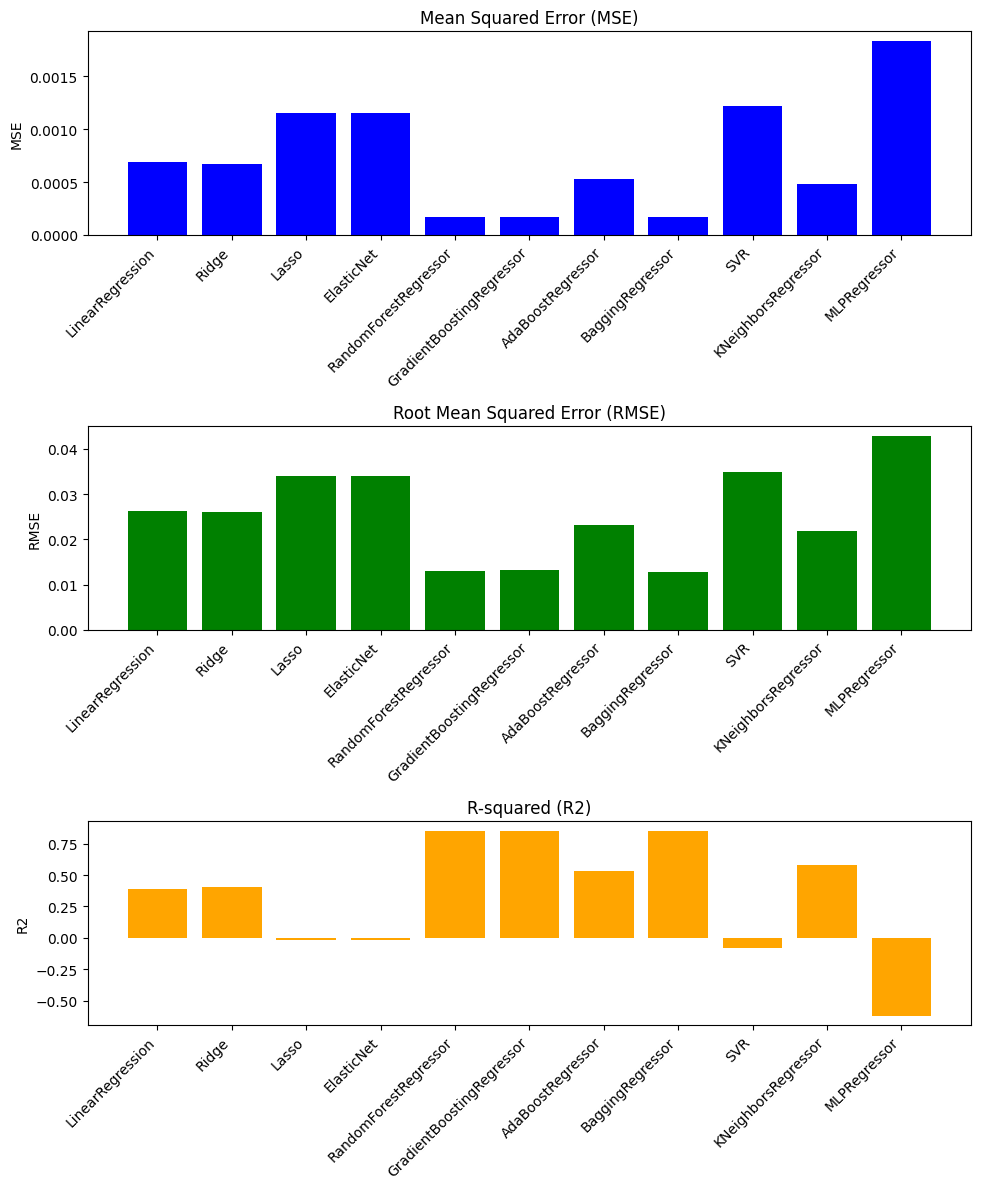

In [ ]:
# Создаем фигуру и оси для графиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# График среднеквадратичной ошибки (MSE)
ax1.bar(df_results['Model'], df_results['MSE'], color='blue')
ax1.set_title('Mean Squared Error (MSE)')
ax1.set_ylabel('MSE')
ax1.set_xticklabels(df_results['Model'], rotation=45, ha='right')

# График корня из среднеквадратичной ошибки (RMSE)
ax2.bar(df_results['Model'], df_results['RMSE'], color='green')
ax2.set_title('Root Mean Squared Error (RMSE)')
ax2.set_ylabel('RMSE')
ax2.set_xticklabels(df_results['Model'], rotation=45, ha='right')

# График коэффициента детерминации (R2)
ax3.bar(df_results['Model'], df_results['R2'], color='orange')
ax3.set_title('R-squared (R2)')
ax3.set_ylabel('R2')
ax3.set_xticklabels(df_results['Model'], rotation=45, ha='right')

# Регулируем расположение графиков
plt.tight_layout()

# Показываем графики
plt.show()

# Кроссвалидация RandomForest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Создаем объект RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Выполняем кросс-валидацию
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores = np.sqrt(-cv_scores)

# Выводим результаты кросс-валидации
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

Cross-Validation RMSE Scores: [0.01720326 0.01180801 0.02036627 0.01876917 0.01085549 0.01390209
 0.0181299  0.01466228 0.01409172 0.01635309]
Mean RMSE: 0.01561412698402342


In [ ]:
from sklearn.model_selection import GridSearchCV

# Определяем пространство поиска гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем объект RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Создаем объект GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Выполняем поиск по сетке
grid_search.fit(X_train, y_train)

# Выводим оптимальные гиперпараметры
print("Best Parameters:", grid_search.best_params_)

# Получаем лучшую модель
best_rf_model = grid_search.best_estimator_

# Пересчитываем кросс-валидацию с использованием лучших параметров
cv_scores_optimized = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores_optimized = np.sqrt(-cv_scores_optimized)

# Выводим результаты кросс-валидации до и после оптимизации
print("\nBefore Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

print("\nAfter Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores_optimized)
print("Mean RMSE:", np.mean(cv_rmse_scores_optimized))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Before Optimization:
Cross-Validation RMSE Scores: [0.01720326 0.01180801 0.02036627 0.01876917 0.01085549 0.01390209
 0.0181299  0.01466228 0.01409172 0.01635309]
Mean RMSE: 0.01561412698402342

After Optimization:
Cross-Validation RMSE Scores: [0.01753445 0.01154423 0.02027983 0.01827564 0.01056409 0.01399693
 0.01823637 0.01433991 0.01327237 0.01602793]
Mean RMSE: 0.015407173755603205


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Создаем объект RandomForestRegressor с оптимальными гиперпараметрами
best_rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Выполняем кросс-валидацию
cv_scores_optimized = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores_optimized = np.sqrt(-cv_scores_optimized)

# Выводим результаты кросс-валидации до и после оптимизации
print("\nBefore Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

print("\nAfter Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores_optimized)
print("Mean RMSE:", np.mean(cv_rmse_scores_optimized))


Before Optimization:
Cross-Validation RMSE Scores: [0.01720326 0.01180801 0.02036627 0.01876917 0.01085549 0.01390209
 0.0181299  0.01466228 0.01409172 0.01635309]
Mean RMSE: 0.01561412698402342

After Optimization:
Cross-Validation RMSE Scores: [0.01530919 0.01932015 0.01178898 0.01695673 0.01571617]
Mean RMSE: 0.015818244395356777


In [ ]:
# Обучаем оптимизированную модель
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# Assuming you have an optimized RandomForest model named 'best_rf_model'
best_rf_model.fit(X_train, y_train)  # Fit the model on the entire training set

# Making predictions on the training data
y_pred_train_optimized = best_rf_model.predict(X_train)

In [ ]:
# Получение предсказаний для тестовой выборки
y_test_pred_optimized = best_rf_model.predict(X_test)

# Расчет метрик для оптимизированной модели
mse_optimized = mean_squared_error(y_test, y_test_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_test_pred_optimized)

## Визуализации предсказаний RandomForest


In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_pred_train_optimized, label='Optimized RandomForest Train', alpha=0.7, color='green')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred_optimized, label='Optimized RandomForest Test', alpha=0.7)

# Scatter plot for test data with RMSE bounds
lower_bound_rf = np.sort(y_test - rmse_optimized)
upper_bound_rf = np.sort(y_test + rmse_optimized)
plt.fill_between(np.sort(y_test), lower_bound_rf, upper_bound_rf, color='blue', alpha=0.2, label='RMSE Bounds')

# Ideal prediction line
plt.plot(y_test_pred_optimized, y_test_pred_optimized, label='Perfect Prediction', linestyle='--', color='red', alpha=0.7)

# Text with metrics in the upper-left corner of the plot
text_optimized = f'Optimized RF MSE: {mse_optimized:.4f}, RMSE: {rmse_optimized:.4f}, R2: {r2_optimized:.4f}'
plt.text(0.015, 0.78, text_optimized, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

# Display the plot
plt.title('Scatter Plot RandomForestRegression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Кроссвалидация Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Создаем базовую модель (например, DecisionTreeRegressor)
base_model = DecisionTreeRegressor()

# Создаем объект BaggingRegressor
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Выполняем кросс-валидацию
cv_scores = cross_val_score(bagging_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores = np.sqrt(-cv_scores)

# Выводим результаты кросс-валидации
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

In [27]:
from sklearn.model_selection import GridSearchCV

# Определяем пространство поиска гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': [None, 10, 20],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}

# Создаем базовую модель (DecisionTreeRegressor)
base_model = DecisionTreeRegressor()

# Создаем объект BaggingRegressor
bagging_model = BaggingRegressor(base_model, random_state=42)

# Создаем объект GridSearchCV
grid_search = GridSearchCV(bagging_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Выполняем поиск по сетке
grid_search.fit(X_train, y_train)

# Выводим оптимальные гиперпараметры
print("Best Parameters:", grid_search.best_params_)

# Получаем лучшую модель
best_bagging_model = grid_search.best_estimator_

# Пересчитываем кросс-валидацию с использованием лучших параметров
cv_scores_optimized = cross_val_score(best_bagging_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores_optimized = np.sqrt(-cv_scores_optimized)

# Выводим результаты кросс-валидации до и после оптимизации
print("\nBefore Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

print("\nAfter Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores_optimized)
print("Mean RMSE:", np.mean(cv_rmse_scores_optimized))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of BaggingRegressor is deprecated in favor of 'estimator'. See BaggingRegressor's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Parameters: {'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'n_estimators': 200}

Before Optimization:
Cross-Validation RMSE Scores: [0.01721733 0.01184476 0.02081566 0.01890296 0.01047116 0.01404021
 0.01811946 0.01455495 0.0142086  0.01713075]
Mean RMSE: 0.01573058366316683

After Optimization:
Cross-Validation RMSE Scores: [0.01760697 0.01144533 0.02094173 0.01836551 0.01049119 0.01409975
 0.01813138 0.01423597 0.0134664  0.0165761 ]
Mean RMSE: 0.015536032570500694


In [28]:
# Обучаем оптимизированную модель
best_bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=200,
                 random_state=42)

In [29]:
best_bagging_model.fit(X_train, y_train)  # Fit the model on the entire training set

# Making predictions on the training data
y_pred_train_optimized_bag = best_bagging_model.predict(X_train)

In [30]:
# Получение предсказаний для тестовой выборки
y_test_pred_optimized_bag = best_bagging_model.predict(X_test)

# Расчет метрик для оптимизированной модели
mse_optimized_bag = mean_squared_error(y_test, y_test_pred_optimized_bag)
rmse_optimized_bag = np.sqrt(mse_optimized)
r2_optimized_bag = r2_score(y_test, y_test_pred_optimized_bag)

## Визуализации предсказаний Bagging

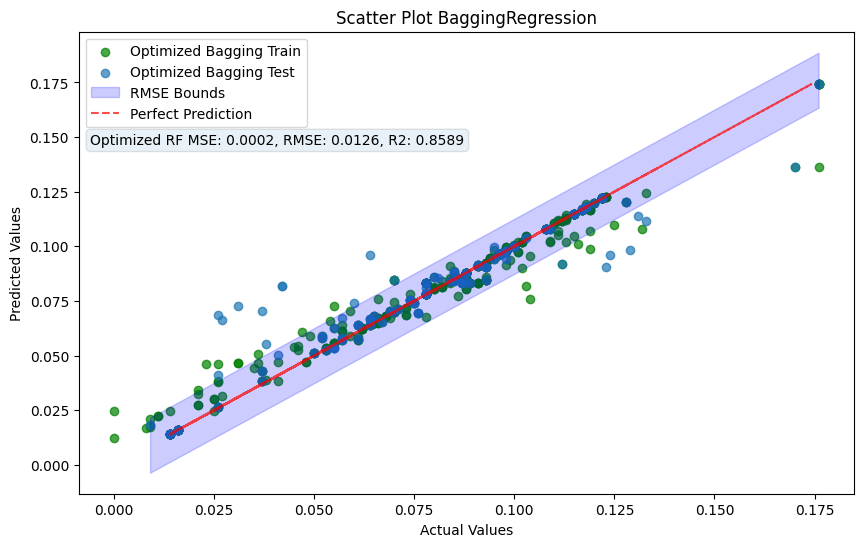

In [31]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_pred_train_optimized_bag, label='Optimized Bagging Train', alpha=0.7, color='green')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred_optimized_bag, label='Optimized Bagging Test', alpha=0.7)

# Scatter plot for test data with RMSE bounds
lower_bound_rf = np.sort(y_test - rmse_optimized_bag)
upper_bound_rf = np.sort(y_test + rmse_optimized_bag)
plt.fill_between(np.sort(y_test), lower_bound_rf, upper_bound_rf, color='blue', alpha=0.2, label='RMSE Bounds')

# Ideal prediction line
plt.plot(y_test_pred_optimized_bag, y_test_pred_optimized_bag, label='Perfect Prediction', linestyle='--', color='red', alpha=0.7)

# Text with metrics in the upper-left corner of the plot
text_optimized = f'Optimized RF MSE: {mse_optimized_bag:.4f}, RMSE: {rmse_optimized_bag:.4f}, R2: {r2_optimized_bag:.4f}'
plt.text(0.015, 0.78, text_optimized, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

# Display the plot
plt.title('Scatter Plot BaggingRegression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Визуализации SHAP

In [ ]:
import shap

# Создание explainer'ов
rf_explainer = shap.TreeExplainer(best_rf_model)

# Вместо TreeExplainer для Bagging используем KernelExplainer
bagging_explainer = shap.KernelExplainer(best_bagging_model.predict, X_train)

# Расчет SHAP-значений для тестового набора данных
shap_values_rf = rf_explainer.shap_values(X_test)
shap_values_bagging = bagging_explainer.shap_values(X_test)

# Построение SHAP-диаграммы для RandomForest
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns, show=False)
plt.title('SHAP Values for RandomForest')
plt.show()

# Построение SHAP-диаграммы для Bagging
shap.summary_plot(shap_values_bagging, X_test, feature_names=X_test.columns, show=False)
plt.title('SHAP Values for Bagging')
plt.show()

  0%|          | 0/109 [00:00<?, ?it/s]